In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
from datetime import datetime
import quantstats as qs

In [3]:
objective_function = [
                  'Sortino',
                  'Calmar',
                    'Return over CVaR',
                    'Custom Function',
                  'Risk Parity',
                'Benchmark' 
    ]
weights = {}
for key in objective_function:
    print(key)
    weights[key] = pd.read_csv('output/'+key+'_weights_v2.csv',index_col='start_date')
    weights[key].index = pd.to_datetime(weights[key].index)
portfolio_returns = pd.read_csv('output/portfolio_returns_v2.csv',index_col='Unnamed: 0')
portfolio_returns.index = pd.to_datetime(portfolio_returns.index)

Sortino
Calmar
Return over CVaR
Custom Function
Risk Parity
Benchmark


C:\Users\Fran\AppData\Local\Temp/ipykernel_69940/3331830999.py:12: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
C:\Users\Fran\AppData\Local\Temp/ipykernel_69940/3331830999.py:13: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)


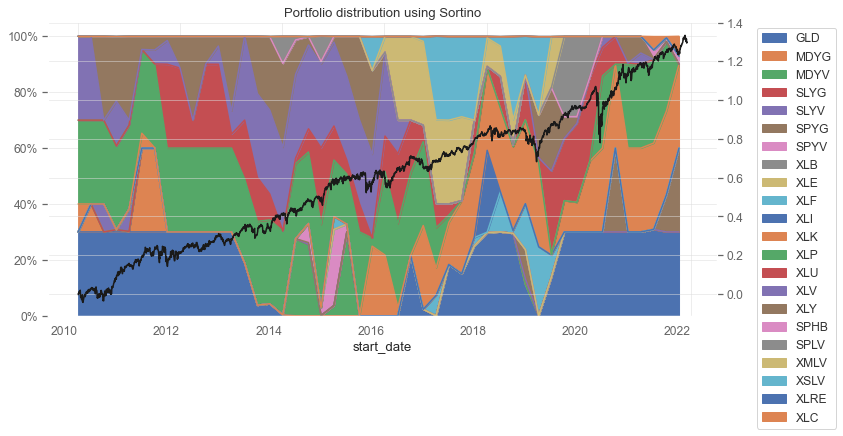

C:\Users\Fran\AppData\Local\Temp/ipykernel_69940/3331830999.py:12: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
C:\Users\Fran\AppData\Local\Temp/ipykernel_69940/3331830999.py:13: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)


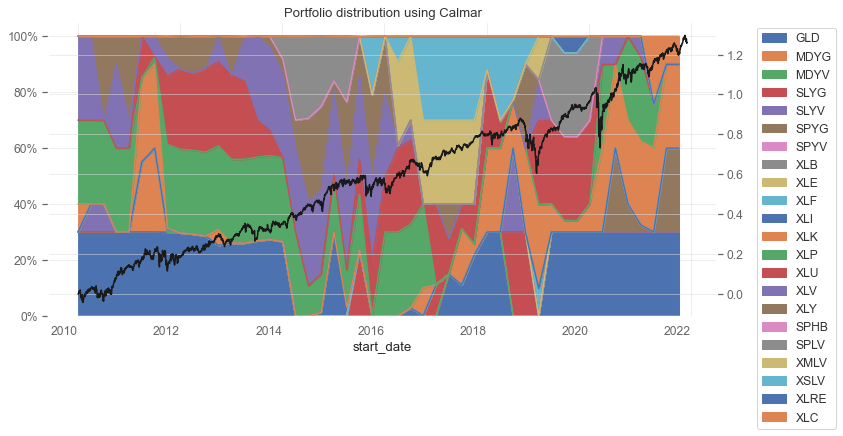

C:\Users\Fran\AppData\Local\Temp/ipykernel_69940/3331830999.py:12: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
C:\Users\Fran\AppData\Local\Temp/ipykernel_69940/3331830999.py:13: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)


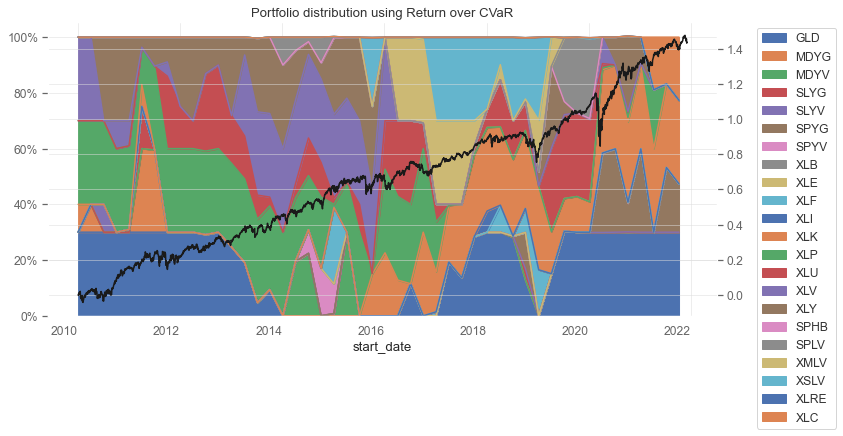

C:\Users\Fran\AppData\Local\Temp/ipykernel_69940/3331830999.py:12: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
C:\Users\Fran\AppData\Local\Temp/ipykernel_69940/3331830999.py:13: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)


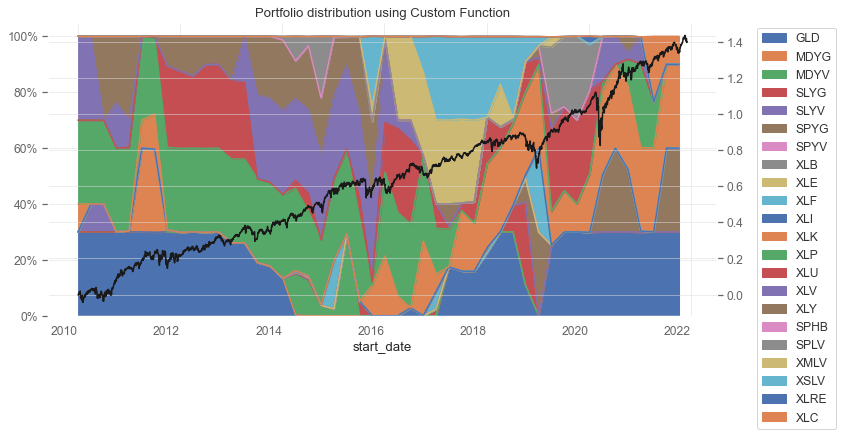

C:\Users\Fran\AppData\Local\Temp/ipykernel_69940/3331830999.py:12: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
C:\Users\Fran\AppData\Local\Temp/ipykernel_69940/3331830999.py:13: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)


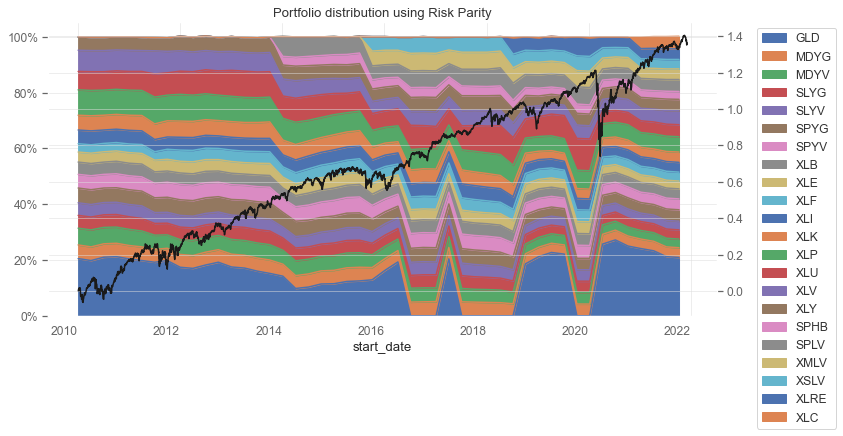

C:\Users\Fran\AppData\Local\Temp/ipykernel_69940/3331830999.py:12: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
C:\Users\Fran\AppData\Local\Temp/ipykernel_69940/3331830999.py:13: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)


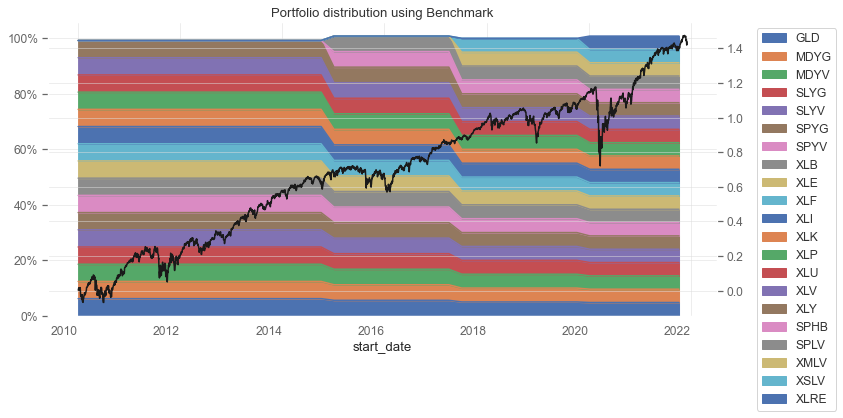

In [4]:
for key in weights.keys():
    df_wide = weights[key].copy()
    df_wide = df_wide.drop(columns='asset_number')
    df_wide = np.round(df_wide.multiply(1/df_wide.sum(axis=1),axis=0),3)
    ax = df_wide.plot.area(
        rot=0,
        figsize=(12, 6),
        title=f"Portfolio distribution using {key}",
        stacked=True,
    )
    leg = ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
    bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
    bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

    # Change to location of the legend. 
    xOffset = 0.05
    bb.x0 += xOffset
    bb.x1 += xOffset
    leg.set_bbox_to_anchor(bb, transform = ax.transAxes)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    np.log(1+portfolio_returns[key]).cumsum().plot(c='k')

    plt.show()

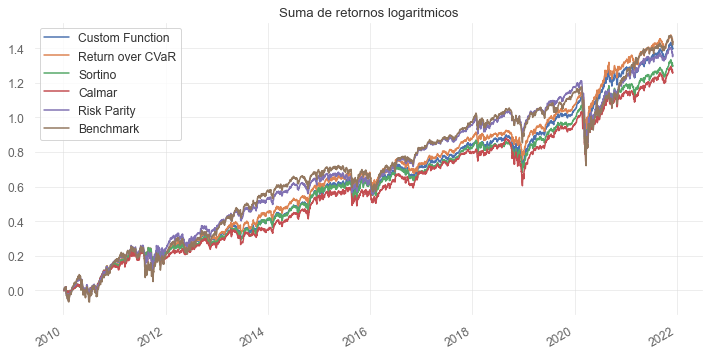

Text(0.5, 1.0, 'Retornos acumulados')

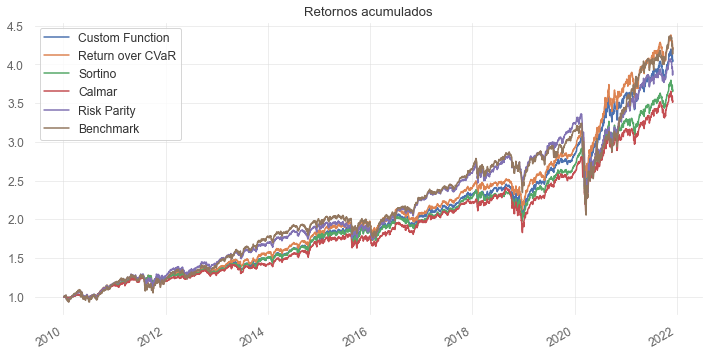

In [5]:

np.log(1+portfolio_returns).cumsum().plot(figsize=(12,6))
plt.title('Suma de retornos logaritmicos')
plt.show()

(1+portfolio_returns).cumprod().plot(figsize=(12,6))
plt.title('Retornos acumulados')


In [6]:
metrics = pd.DataFrame()
for key in objective_function:
    metrics[key] = qs.reports.metrics(portfolio_returns[key],display=False,mode = 'full')

In [7]:
metrics.loc[['Start Period', 'End Period', 
       'Cumulative Return ', 'CAGR%', 'Sharpe', 'Sortino',
       'Max Drawdown ', 'Longest DD Days', 'Volatility (ann.) ', 'Calmar',

       'Expected Yearly %', 'Kelly Criterion ',
       'Daily Value-at-Risk ', 'Expected Shortfall (cVaR) ', 'Gain/Pain Ratio',
       #'Gain/Pain (1M)', 'Payoff Ratio', 'Profit Factor', 'Common Sense Ratio',
       #'CPC Index', 'Tail Ratio', 'Outlier Win Ratio', 'Outlier Loss Ratio',
       #'MTD ', '3M ', '6M ', 'YTD ', '1Y ', '3Y (ann.) ', '5Y (ann.) ',
       #'10Y (ann.) ', 'All-time (ann.) ', 
             'Best Day ', 'Worst Day ',
       'Best Month ', 'Worst Month ', 'Best Year ', 'Worst Year ',
       'Avg. Drawdown ', 'Avg. Drawdown Days', 'Recovery Factor',
       #'Ulcer Index', 'Avg. Up Month ', 'Avg. Down Month ', 'Win Days %',
       #'Win Month %', 'Win Quarter %', 'Win Year %'
            ]]

,Sortino,Calmar,Return over CVaR,Custom Function,Risk Parity,Benchmark
Start Period,2010-01-05,2010-01-05,2010-01-05,2010-01-05,2010-01-05,2010-01-05
End Period,2021-12-02,2021-12-02,2021-12-02,2021-12-02,2021-12-02,2021-12-02
Cumulative Return,2.67,2.53,3.22,3.06,2.92,3.21
CAGR%,0.12,0.11,0.13,0.12,0.12,0.13
Sharpe,0.89,0.85,0.96,0.94,0.84,0.81
Sortino,1.25,1.2,1.36,1.34,1.16,1.13
Max Drawdown,-0.25,-0.26,-0.26,-0.26,-0.38,-0.37
Longest DD Days,429,289,220,214,330,344
Volatility (ann.),0.13,0.14,0.14,0.13,0.15,0.17
Calmar,0.46,0.43,0.49,0.49,0.32,0.35



# Conclusiones:

De los resultados se puede concluir:
- Los pesos en los portfolios que optimizan ratio se tienden a concentrar en algunos pocos activos, aproximadamente 1/3 del total disponible. 
- Los pesos en los activos con el portfolio Risk Parity no varían de forma muy significativa en función del tiempo, esto puede ser beneficioso en caso qué se tuvieran en cuenta las comisiones, qué en el presente trabajo no se han tenido en cuenta. 
- Las optimizaciones en todos los casos logra disminuir la volatilidad y aumentar los ratios qué miden la unidad de retorno por volatilidad. 
- El portfolio Custom Function no mejora en forma significativa ninguna de las métricas en comparación del resto de los portfolios. 
- Consideramos al portfolio Return over CVaR como el más conveniente, dado el retorno superador, ratios, drawdowns y recuperaciones.


# Metricas bien calculadas

In [26]:
exp_returns = ((1+portfolio_returns).cumprod().iloc[-1]**(365/len(portfolio_returns))-1)
sharpe = exp_returns.multiply(1/(np.sqrt(252)*portfolio_returns.std()))

def calculate_downside_volatility(returns, periods=252):
    mean = returns.mean()
    N = len(returns[returns<0])
    negative_variance = ((returns[returns<0]-mean)**2).sum()/(N-1)
    negative_volatility = np.sqrt(negative_variance)
    return negative_volatility*np.sqrt(periods) 
downside_volatility = calculate_downside_volatility(portfolio_returns)
sortino = exp_returns/downside_volatility
calmar = (-1)*exp_returns/qs.stats.max_drawdown(portfolio_returns)



metrics = pd.DataFrame()
metrics['sharpe'] = sharpe
metrics['sortino'] = sortino
metrics['calmar'] = calmar
np.round(metrics.T,2)

,Custom Function,Return over CVaR,Sortino,Calmar,Risk Parity,Benchmark
sharpe,1.38,1.41,1.29,1.22,1.20,1.15
sortino,1.89,1.93,1.76,1.66,1.62,1.55
calmar,0.73,0.74,0.68,0.64,0.48,0.52


In [7]:
for i in weights:
    display(weights[i])

,asset_number,GLD,MDYG,MDYV,SLYG,SLYV,SPYG,SPYV,XLB,XLE,...,XLP,XLU,XLV,XLY,SPHB,SPLV,XMLV,XSLV,XLRE,XLC
start_date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,16,3.000000e-01,3.945250e-12,0.000000e+00,0.000000e+00,0.000000e+00,2.557040e-12,0.000000e+00,0.000000e+00,0.000000e+00,...,3.000000e-01,4.699916e-12,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2010-04-06,16,3.000000e-01,9.999983e-02,1.302328e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.000000e-01,0.000000e+00,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2010-07-06,16,3.000000e-01,0.000000e+00,1.487875e-10,3.658255e-11,1.000000e-01,0.000000e+00,4.255446e-12,0.000000e+00,0.000000e+00,...,3.000000e-01,4.368235e-11,4.712032e-11,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2010-10-04,16,3.000000e-01,8.135799e-03,1.941303e-11,3.120052e-04,1.185872e-11,7.517626e-13,6.335826e-12,7.444472e-12,1.194091e-11,...,3.000000e-01,1.464870e-12,1.602139e-01,2.313383e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2011-01-03,16,2.999536e-01,4.386897e-05,1.520840e-03,5.645901e-05,8.011609e-02,1.167579e-05,1.183711e-05,1.233739e-05,1.240277e-05,...,2.998346e-01,1.052741e-05,1.841688e-02,2.999564e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2011-04-04,16,3.000000e-01,3.000000e-01,4.278660e-11,8.584305e-11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.000000e-01,0.000000e+00,4.691977e-11,4.706597e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2011-07-05,16,3.000000e-01,2.999999e-01,2.152019e-09,7.207695e-09,5.075856e-09,1.890729e-09,1.789252e-09,5.919482e-09,5.271788e-09,...,2.999999e-01,3.353110e-11,4.993422e-02,4.900883e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2011-10-03,16,2.999999e-01,2.386111e-08,2.153525e-08,2.493389e-08,2.877055e-08,1.853852e-08,1.963753e-08,3.364202e-08,2.902606e-08,...,2.999999e-01,2.999957e-01,8.497594e-02,1.502814e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2012-01-03,16,2.999997e-01,8.847106e-08,6.692476e-07,8.500135e-08,9.268282e-08,6.920015e-08,7.063346e-08,1.232340e-07,1.008962e-07,...,2.999996e-01,2.855832e-01,3.856986e-07,1.144156e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


,asset_number,GLD,MDYG,MDYV,SLYG,SLYV,SPYG,SPYV,XLB,XLE,...,XLP,XLU,XLV,XLY,SPHB,SPLV,XMLV,XSLV,XLRE,XLC
start_date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,16,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.310724e-11,3.339796e-11,2.625654e-11,3.241259e-11,...,3.000000e-01,1.337410e-09,3.000000e-01,2.806062e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2010-04-06,16,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.999973e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.000000e-01,0.000000e+00,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2010-07-06,16,3.000000e-01,0.000000e+00,5.465802e-12,3.216410e-12,1.000000e-01,8.057748e-12,0.000000e+00,0.000000e+00,2.998253e-12,...,3.000000e-01,0.000000e+00,7.330615e-12,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2010-10-04,16,3.000000e-01,1.085235e-13,3.156520e-13,1.230785e-12,1.738727e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.000000e-01,0.000000e+00,3.000000e-01,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2011-01-03,16,3.000000e-01,2.754824e-13,1.968703e-14,3.358785e-13,0.000000e+00,1.209846e-12,2.165526e-12,3.622139e-12,5.448234e-12,...,3.000000e-01,2.272108e-12,1.000000e-01,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2011-04-04,16,3.000000e-01,2.506978e-01,7.899034e-12,0.000000e+00,1.173211e-11,8.133988e-13,1.820641e-11,2.038006e-12,0.000000e+00,...,0.000000e+00,1.493022e-01,0.000000e+00,6.823162e-13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2011-07-05,16,2.999922e-01,2.999936e-01,1.859812e-06,2.559048e-05,2.009417e-06,1.518534e-06,1.892903e-06,1.547619e-06,1.647271e-06,...,2.560357e-02,1.694928e-06,7.441100e-02,1.712270e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2011-10-03,16,2.992972e-01,4.315796e-09,0.000000e+00,1.046507e-02,0.000000e+00,2.083732e-09,0.000000e+00,0.000000e+00,0.000000e+00,...,3.000000e-01,2.458531e-01,6.605530e-02,7.434617e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2012-01-03,16,2.955156e-01,7.476648e-08,6.764137e-11,1.034553e-10,5.357905e-12,7.972937e-09,2.474923e-11,4.560493e-14,8.016098e-12,...,2.999992e-01,2.867472e-01,3.692528e-06,1.177342e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


,asset_number,GLD,MDYG,MDYV,SLYG,SLYV,SPYG,SPYV,XLB,XLE,...,XLP,XLU,XLV,XLY,SPHB,SPLV,XMLV,XSLV,XLRE,XLC
start_date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,16,3.000000e-01,1.797075e-09,0.000000e+00,0.000000e+00,0.000000e+00,1.239839e-09,0.000000e+00,0.000000e+00,0.000000e+00,...,3.000000e-01,0.000000e+00,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2010-04-06,16,2.999995e-01,9.895922e-02,3.836351e-11,9.583459e-09,1.040870e-03,8.137446e-09,1.271668e-07,4.871360e-08,1.487162e-07,...,2.999998e-01,5.628218e-08,3.000000e-01,3.886829e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2010-07-06,16,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-01,7.540468e-10,3.178703e-09,3.428018e-09,5.663272e-09,...,3.000000e-01,1.992409e-09,0.000000e+00,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2010-10-04,16,3.000000e-01,1.597951e-08,8.994479e-09,1.367503e-08,8.691311e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.000000e-01,0.000000e+00,1.000000e-01,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2011-01-03,16,3.000000e-01,2.292096e-09,6.848549e-08,1.851139e-08,1.018669e-02,8.142863e-09,8.124952e-09,3.287326e-09,1.263017e-08,...,2.999999e-01,1.073756e-08,8.981539e-02,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2011-04-04,16,2.998466e-01,2.998707e-01,3.225731e-05,1.506168e-01,4.263199e-05,3.739758e-05,3.932511e-05,4.276045e-05,4.721910e-05,...,1.340628e-01,2.103050e-05,2.376384e-05,3.594097e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2011-07-05,16,2.999994e-01,2.953227e-01,2.847169e-08,2.827110e-08,1.572246e-07,3.039815e-08,1.348940e-07,2.063636e-07,2.734318e-07,...,2.999998e-01,2.988503e-08,1.073670e-03,1.035994e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2011-10-03,16,2.999994e-01,1.304902e-08,3.411339e-15,2.061178e-08,9.432550e-08,1.695244e-07,2.339754e-08,5.604013e-07,4.651995e-07,...,2.999996e-01,2.604845e-01,5.059849e-02,8.891695e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2012-01-03,16,2.999997e-01,1.176812e-06,1.158611e-06,1.149757e-06,7.545379e-07,8.727499e-07,2.426613e-08,4.330391e-07,2.896673e-07,...,2.999992e-01,1.523678e-01,2.635543e-07,2.475922e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


,asset_number,GLD,MDYG,MDYV,SLYG,SLYV,SPYG,SPYV,XLB,XLE,...,XLP,XLU,XLV,XLY,SPHB,SPLV,XMLV,XSLV,XLRE,XLC
start_date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,16,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.000000e-01,0.000000e+00,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2010-04-06,16,3.000000e-01,2.932142e-11,2.531339e-11,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.000000e-01,0.000000e+00,3.000000e-01,2.294729e-11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2010-07-06,16,3.000000e-01,3.402834e-14,0.000000e+00,2.854055e-14,1.000000e-01,0.000000e+00,0.000000e+00,1.590147e-14,2.902396e-14,...,3.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2010-10-04,16,3.000000e-01,5.284047e-10,8.902812e-13,1.506897e-12,1.186304e-12,2.996563e-13,2.241708e-12,2.809595e-12,4.438942e-12,...,3.000000e-01,4.783303e-13,1.622525e-01,2.377475e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2011-01-03,16,3.000000e-01,6.533289e-09,2.192414e-08,1.737663e-08,3.479613e-03,3.773703e-11,1.076686e-10,1.168207e-08,2.850963e-10,...,3.000000e-01,1.217678e-10,9.652036e-02,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2011-04-04,16,2.999999e-01,3.000000e-01,0.000000e+00,0.000000e+00,1.496778e-08,2.461532e-09,4.514728e-08,1.761424e-08,3.806662e-08,...,3.000000e-01,6.748717e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2011-07-05,16,3.000000e-01,2.979283e-01,0.000000e+00,0.000000e+00,0.000000e+00,7.962771e-05,0.000000e+00,0.000000e+00,0.000000e+00,...,2.760942e-01,0.000000e+00,3.732055e-03,9.503924e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2011-10-03,16,2.999827e-01,7.978939e-06,7.201055e-06,8.296230e-03,2.028272e-06,4.442867e-06,6.043588e-06,3.013383e-05,1.849875e-05,...,2.947452e-01,2.908585e-01,1.929003e-05,1.060802e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2012-01-03,16,2.995234e-01,1.085347e-06,2.778214e-08,3.530079e-06,6.123623e-08,1.106669e-05,1.953913e-07,2.457121e-06,1.353661e-06,...,2.999983e-01,2.767115e-01,1.471787e-05,1.238452e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


,asset_number,GLD,MDYG,MDYV,SLYG,SLYV,SPYG,SPYV,XLB,XLE,...,XLP,XLU,XLV,XLY,SPHB,SPLV,XMLV,XSLV,XLRE,XLC
start_date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,16,2.047998e-01,0.048829,0.060271,0.046037,0.044976,0.052651,0.048985,0.043929,0.036421,...,0.090580,0.066105,0.076215,0.047723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-04-06,16,1.983463e-01,0.048791,0.060909,0.046058,0.045358,0.052924,0.049665,0.044363,0.036775,...,0.091442,0.067303,0.076473,0.048359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-07-06,16,2.103965e-01,0.047597,0.058718,0.045162,0.044448,0.052209,0.049492,0.044265,0.036753,...,0.090228,0.065978,0.075673,0.047541,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-10-04,16,2.122934e-01,0.047507,0.058112,0.044790,0.044081,0.052065,0.049607,0.044842,0.037209,...,0.089503,0.065996,0.074945,0.047335,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-03,16,2.044703e-01,0.048100,0.057926,0.045160,0.044414,0.052577,0.050189,0.045316,0.037564,...,0.090289,0.066927,0.075506,0.048081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-04-04,16,1.980883e-01,0.049129,0.057482,0.045481,0.044770,0.053125,0.050960,0.046001,0.037946,...,0.089751,0.067514,0.075118,0.048362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-07-05,16,1.922989e-01,0.045689,0.050891,0.041843,0.039467,0.053396,0.052436,0.041464,0.042184,...,0.096009,0.083081,0.083361,0.047597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-10-03,16,1.983354e-01,0.044007,0.047957,0.042411,0.039487,0.054478,0.054166,0.039868,0.041823,...,0.092495,0.080380,0.077266,0.049446,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-01-03,16,1.740605e-01,0.045795,0.052581,0.044720,0.042044,0.055681,0.055074,0.040527,0.042455,...,0.095702,0.082567,0.072665,0.052468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,asset_number,GLD,MDYG,MDYV,SLYG,SLYV,SPYG,SPYV,XLB,XLE,...,XLK,XLP,XLU,XLV,XLY,SPHB,SPLV,XMLV,XSLV,XLRE
start_date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,16,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,...,0.062500,0.062500,0.062500,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000
2010-04-06,16,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,...,0.062500,0.062500,0.062500,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000
2010-07-06,16,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,...,0.062500,0.062500,0.062500,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000
2010-10-04,16,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,...,0.062500,0.062500,0.062500,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-03,16,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,...,0.062500,0.062500,0.062500,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000
2011-04-04,16,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,...,0.062500,0.062500,0.062500,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000
2011-07-05,16,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,...,0.062500,0.062500,0.062500,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000
2011-10-03,16,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,...,0.062500,0.062500,0.062500,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000
2012-01-03,16,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,...,0.062500,0.062500,0.062500,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000


Custom Function


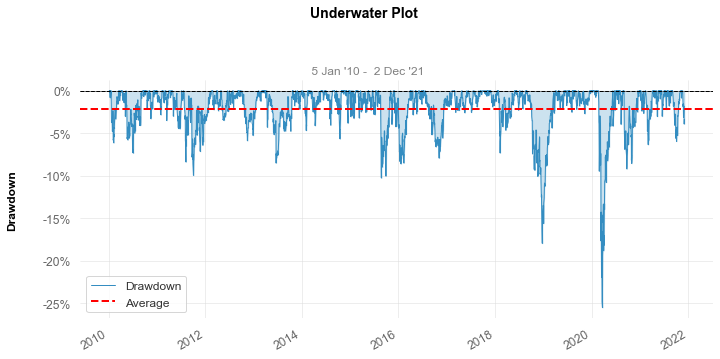

Return over CVaR


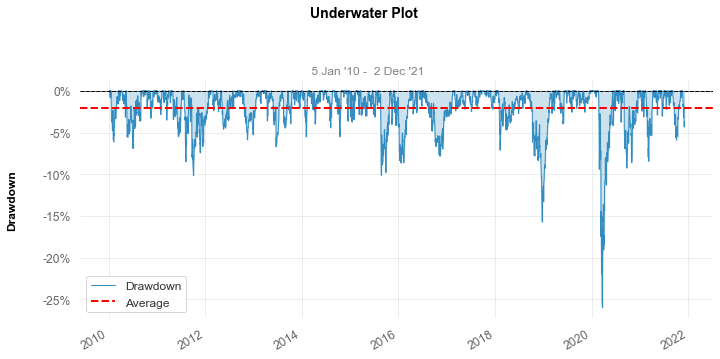

Sortino


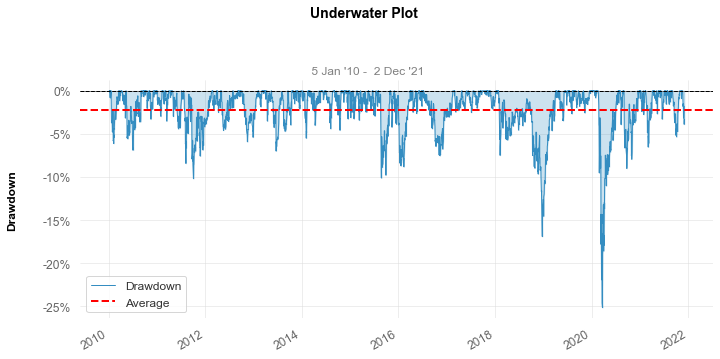

Calmar


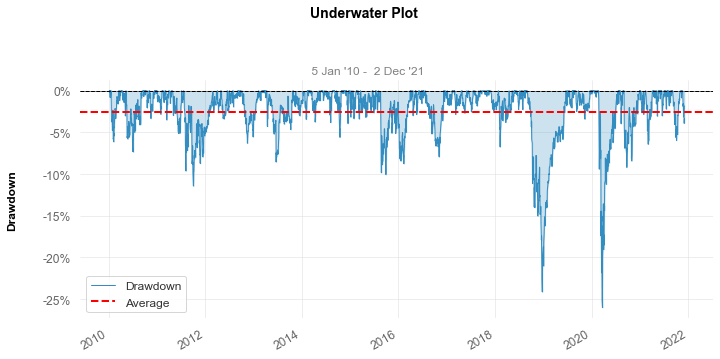

Risk Parity


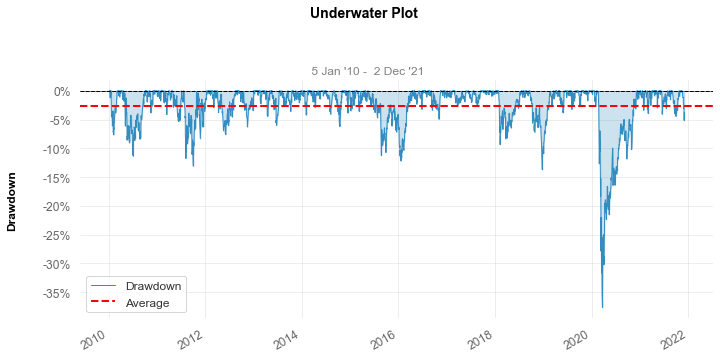

Benchmark


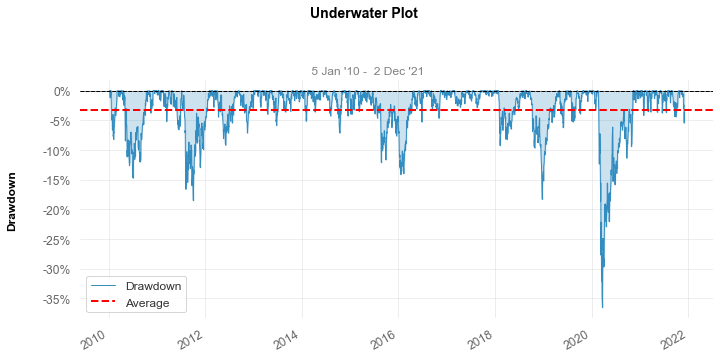

In [8]:
for key in portfolio_returns.keys():
    print(key)
    qs.plots.drawdown(portfolio_returns[key])

In [32]:
prices = pd.read_csv('prices_etf.csv',index_col='Unnamed: 0')
#prices = prices.dropna()
prices.index = pd.to_datetime(prices.index)
prices.index = [x.astimezone(None) for x in prices.index]

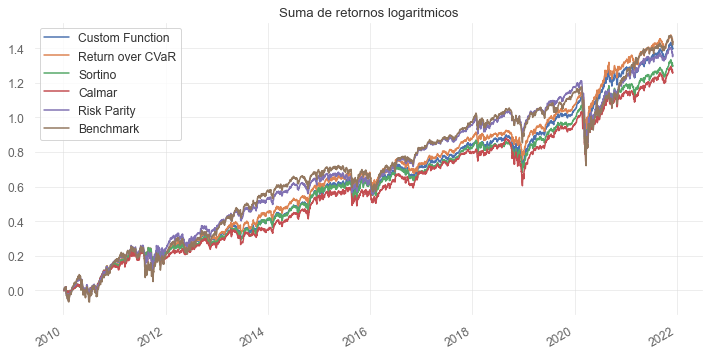

Text(0.5, 1.0, 'Retornos acumulados')

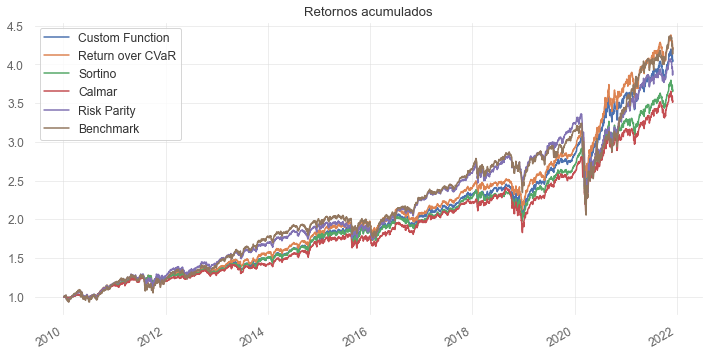

In [29]:

np.log(1+portfolio_returns).cumsum().plot(figsize=(12,6))
plt.title('Suma de retornos logaritmicos')
plt.show()

(1+portfolio_returns).cumprod().plot(figsize=(12,6))
plt.title('Retornos acumulados')


<AxesSubplot:>

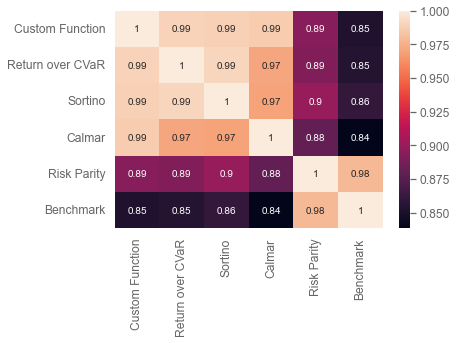

In [45]:
import seaborn as sns
sns.heatmap(portfolio_returns.corr(),annot=True)

<AxesSubplot:>

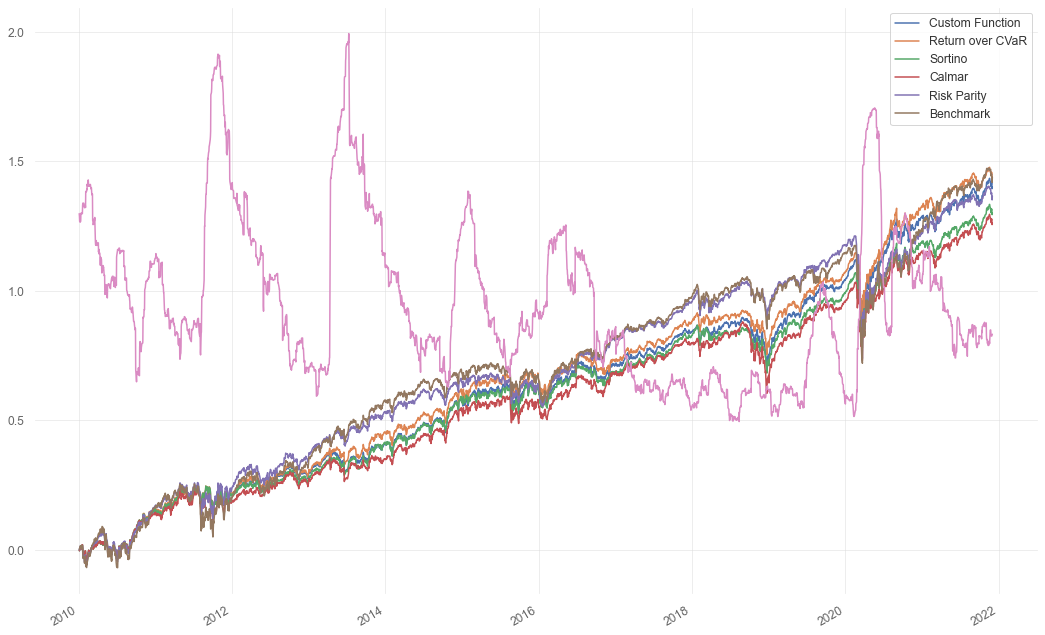

In [41]:
#for col in prices.columns:

np.log(1+portfolio_returns).cumsum().plot()
(100*prices['GLD'].pct_change().rolling(63).std()).loc[datetime(2010,1,1):].plot(figsize=(18,12))


    #plt.title(col)
 #   plt.show()

Text(0, 0.5, 'Retorno Promedio')

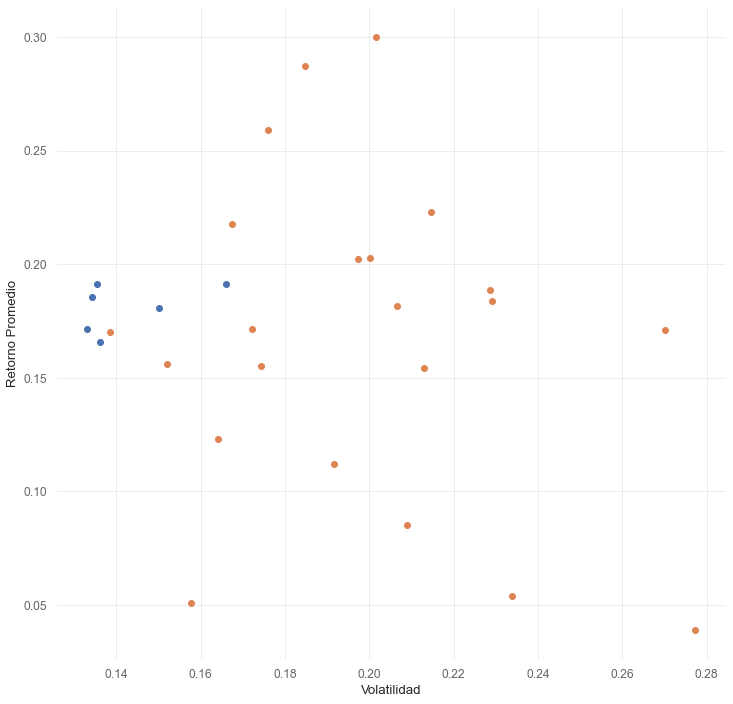

In [38]:

asset_returns = prices.pct_change().loc[portfolio_returns.index]

plt.figure(figsize=(12,12))
plt.scatter((np.sqrt(252)*portfolio_returns.std()),((1+portfolio_returns).cumprod().iloc[-1]**(365/len(portfolio_returns))-1))

plt.scatter((np.sqrt(252)*asset_returns.std()),((1+asset_returns).cumprod().iloc[-1]**(365/len(portfolio_returns))-1))

plt.xlabel('Volatilidad')
plt.ylabel('Retorno Promedio')


In [22]:
asset_retunrs

NameError: name 'asset_retunrs' is not defined

In [32]:
prices#.loc[portfolio_returnso.index]

,Unnamed: 0,GLD,MDYG,MDYV,SLYG,SLYV,SPHB,SPLV,SPYG,SPYV,...,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XMLV,XSLV
0,2000-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.972034,19.214866,42.524685,13.705610,NaN,12.526191,21.944735,23.096359,NaN,NaN
1,2000-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.448781,18.688522,40.369303,13.320046,NaN,12.152003,21.445004,22.406228,NaN,NaN
2,2000-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.454013,18.635222,40.392314,13.518852,NaN,12.412109,21.387064,22.337215,NaN,NaN
3,2000-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.856918,18.855086,38.451703,13.808025,NaN,12.434926,21.321881,22.383224,NaN,NaN
4,2000-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.050522,19.574645,39.119028,14.687594,NaN,12.539881,21.582611,23.433756,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5511,2021-11-26 00:00:00+00:00,166.85,80.08,69.56,90.58,84.53,76.91,63.86,70.61,40.29,...,38.770000,103.210000,165.990000,71.960000,47.80,66.760000,131.970000,204.070000,55.77,49.58
5512,2021-11-29 00:00:00+00:00,166.62,80.34,69.46,90.57,84.10,78.47,64.37,71.93,40.40,...,38.890000,103.390000,170.140000,72.140000,48.40,67.750000,132.330000,207.240000,55.74,49.50
5513,2021-11-30 00:00:00+00:00,165.50,78.51,67.54,88.95,82.24,76.52,62.65,70.88,39.45,...,37.960000,100.770000,168.720000,70.290000,47.39,65.770000,129.730000,204.440000,54.49,48.65
5514,2021-12-01 00:00:00+00:00,166.16,76.97,66.50,87.57,80.97,74.81,62.46,69.82,39.14,...,37.540000,99.370000,166.410000,69.950000,46.77,65.890000,129.500000,200.750000,54.03,48.53
